# Machine Learning: AllLife Bank Personal Loan Campaign

## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [ ]:
#Importing libraries for data analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Importing Libraries for Model building and evaluation
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

## Loading the dataset

In [ ]:
#Load the data set
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
Original_data = pd.read_csv('/content/drive/MyDrive/AI and Machine Learning/Project 2/Loan_Modelling.csv')
df = Original_data.copy()

## Data Overview

* Observations
* Sanity checks

In [ ]:
#Checking to see number of rows and columns
df.shape

(5000, 14)

In [ ]:
# Check data information like data types and number of entries
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [ ]:
#Statistical summary of the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [ ]:
#Checking for null values
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

In [ ]:
#Checking for duplicate values
df.duplicated().sum()

0

In [ ]:
df.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
#Dropping 'ID' as we do not need it or add value for our analysis
df.drop('ID',axis=1,inplace=True)

In [ ]:
#Check value counts for education
df['Education'].value_counts()

1    2096
3    1501
2    1403
Name: Education, dtype: int64

In [ ]:
#Change the education datatype to categorical Education: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
df['Education'] = df['Education'].replace({1:'Undergrad', 2: 'Graduate', 3: 'Professional'})

In [ ]:
#Check if any attributes have negative values
columns = ['Age','Experience','Income','Family','CCAvg','Mortgage','Personal_Loan','Securities_Account','CD_Account','Online','CreditCard']
for col in columns:
  if (df[col]<0).any():
    print(col)


Experience


In [ ]:
#Checking the negative values ofr Experience attribute
df['Experience'][df['Experience']<0].unique()

array([-1, -2, -3])

In [ ]:
#Replace negative values of experience and replace them with positive values. this may be due to data error
df['Experience'] = df['Experience'].replace({-1: 1, -2: 2, -3: 3})

In [ ]:
#Credit card usage
print(f"Number of customers with credit cards {df['CreditCard'].sum()}")
print(f"Percentage of customers with credit cards {df['CreditCard'].sum()*100/df.shape[0]}")

Number of customers with credit cards 1470
Percentage of customers with credit cards 29.4


In [ ]:
df['ZIPCode'].nunique()

467

In [ ]:
df['ZIPCode'] = df['ZIPCode'].astype('str')

In [ ]:
#Narrowing the zipcode down to groups as first 2 digits represents the state and area inside the state
df['ZIPCode'].str[0:2].nunique()
df["ZIPCode"] = df["ZIPCode"].str[0:2]

In [ ]:
#Convert categorical values to category data type
cats = ['Education','Personal_Loan','Securities_Account','CD_Account','Online','CreditCard','ZIPCode']
df[cats] = df[cats].astype('category')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 5000 non-null   int64   
 1   Experience          5000 non-null   int64   
 2   Income              5000 non-null   int64   
 3   ZIPCode             5000 non-null   category
 4   Family              5000 non-null   int64   
 5   CCAvg               5000 non-null   float64 
 6   Education           5000 non-null   category
 7   Mortgage            5000 non-null   int64   
 8   Personal_Loan       5000 non-null   category
 9   Securities_Account  5000 non-null   category
 10  CD_Account          5000 non-null   category
 11  Online              5000 non-null   category
 12  CreditCard          5000 non-null   category
dtypes: category(7), float64(1), int64(5)
memory usage: 269.8 KB


## Exploratory Data Analysis.

**Lets try and find answers to some of the questions like below:**

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
2. How many customers have credit cards?
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
4. How does a customer's interest in purchasing a loan vary with their age?
5. How does a customer's interest in purchasing a loan vary with their education?

**Univariate Analysis**

In [ ]:
#Function to do univariate analysis using histogram and boxplots

def hist_box_plot(data, feature):
    """
    Combined Histogram and Boxplot

    data: DataFrame
    feature: str, column name for the numeric variable
    """
    plt.figure(figsize=(12, 6))

    if data[feature].dtype in ['int64', 'float64']:
        # Create histogram
        ax1 = plt.subplot(2, 1, 1)
        sns.histplot(data[feature], bins=20, kde=True, color='skyblue', label='Histogram', ax=ax1)

        # Create boxplot
        ax2 = plt.subplot(2, 1, 2, sharex=ax1)
        sns.boxplot(x=data[feature], color='salmon', width=0.2, linewidth=2, ax=ax2)

        # Adjust positions of subplots
        ax1.set_position([0.125, 0.55, 0.775, 0.4])  # [left, bottom, width, height]
        ax2.set_position([0.125, 0.1, 0.775, 0.4])

        plt.suptitle(f'Univariate Analysis: {feature} Histogram and Boxplot', y=1.02)

        # Manually create legend
        handles, labels = ax1.get_legend_handles_labels()
        plt.legend(handles, labels, loc='upper right')

    else:
        print(f"Unsupported data type for column '{feature}'")

    plt.show()

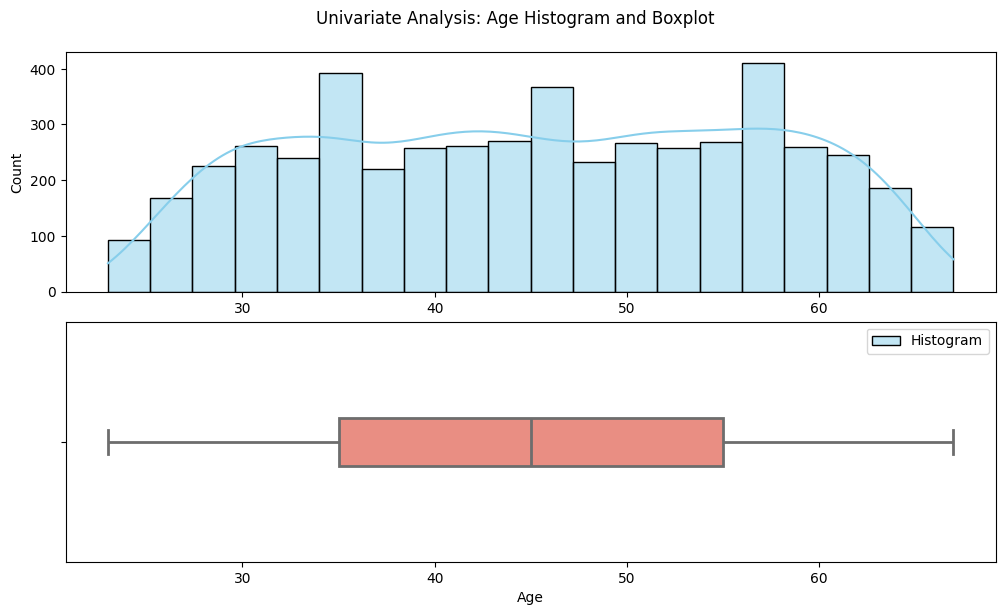

In [ ]:
# Age Analysis
hist_box_plot(df, 'Age')

**Age Observations: Median age in the given dataset is around 45 years and the age is close to a normal distribution**

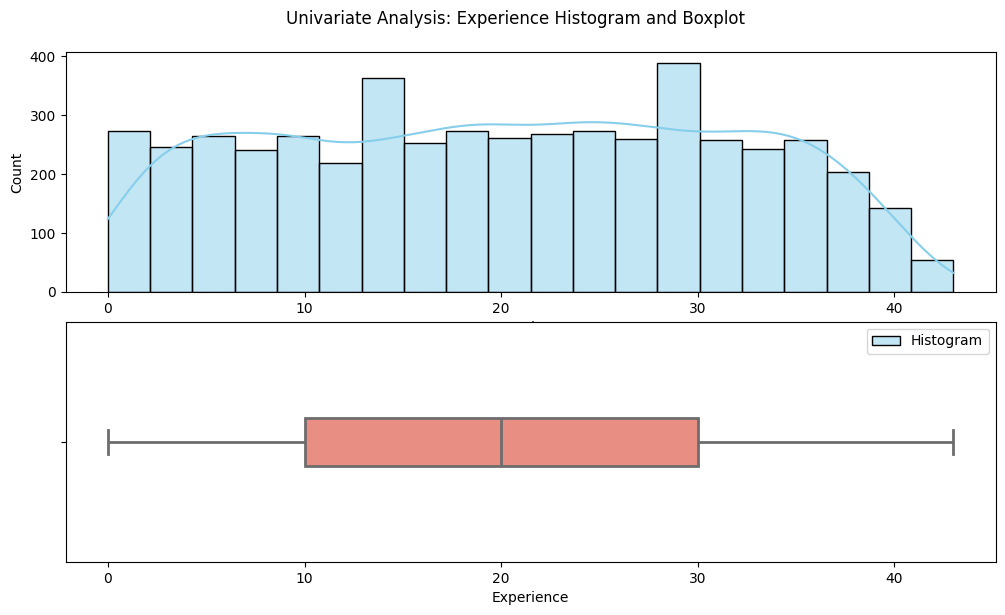

In [ ]:
#Experience analysis
hist_box_plot(df, 'Experience')

**Experience Observations: Median experience in the given dataset is around 20 years**

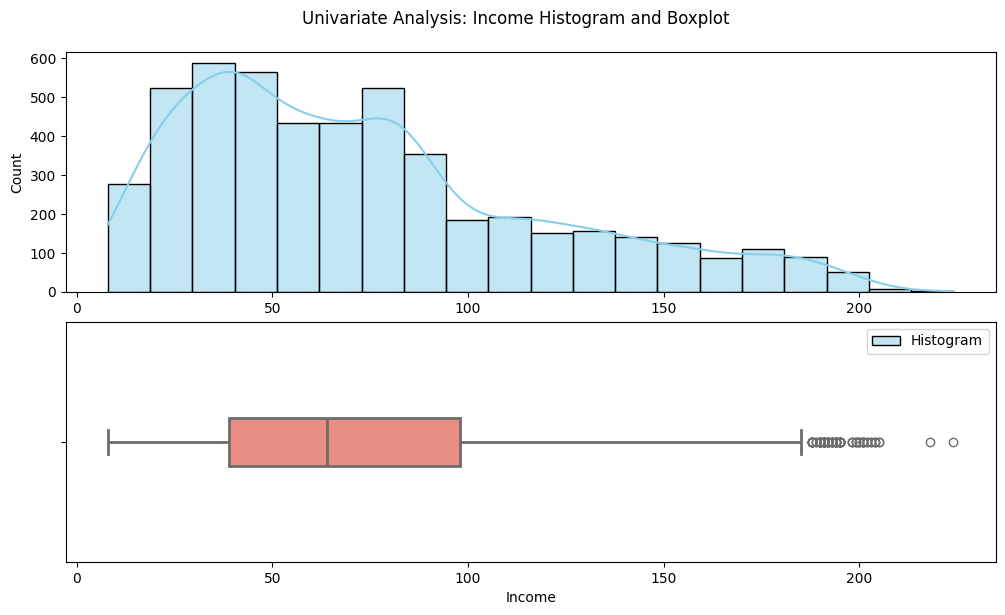

In [ ]:
#Income analysis
hist_box_plot(df, 'Income')

**Income Observations: Income has a right skewed distribution with almost 75% of the people observed below 100K income. There are outliers with income more than around 185k**

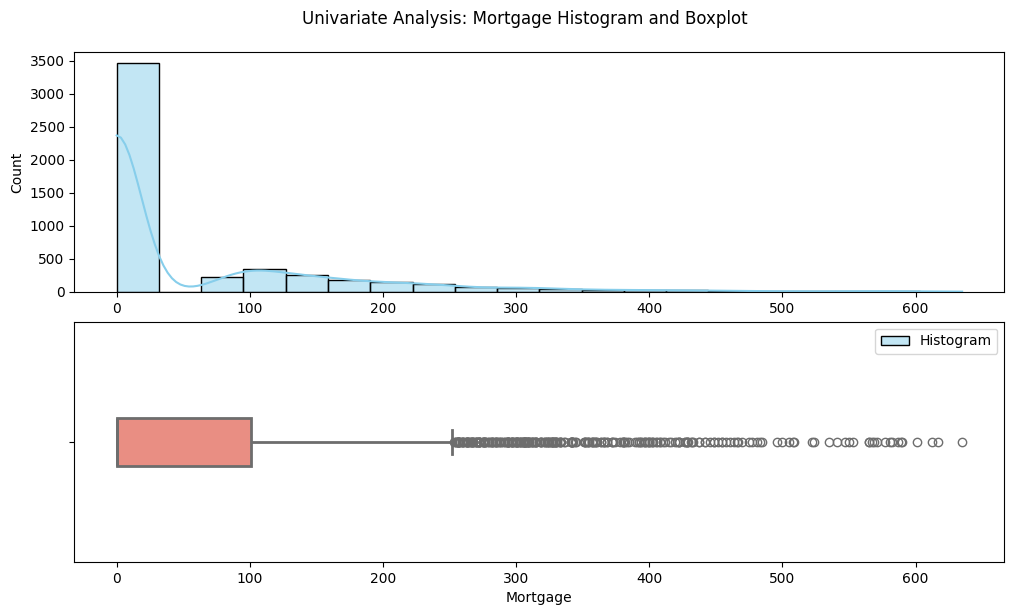

In [ ]:
#Mortgage analysis
hist_box_plot(df, 'Mortgage')

**Mortgage Observations: Mortgage has a highly right skewed distribution with with only a few people with mortgage amount above 500K**

<ipython-input-141-c98cb2034157>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Family', data=df, palette='viridis')


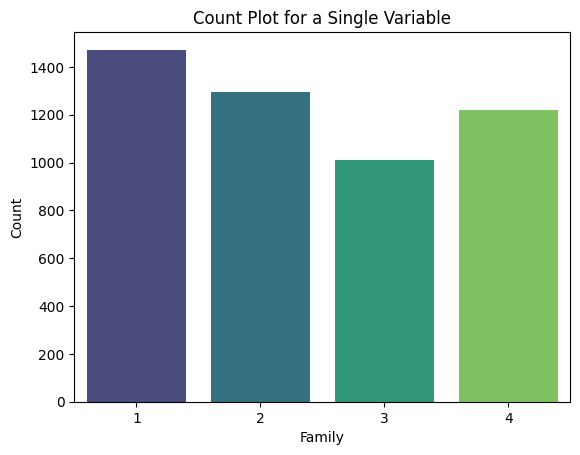

In [ ]:
sns.countplot(x='Family', data=df, palette='viridis')

# Add labels and title
plt.xlabel('Family')
plt.ylabel('Count')
plt.title('Count Plot for a Single Variable')
# Show the plot
plt.show()

**Bi Variate Analysis**

<ipython-input-142-e2c11e01d1a4>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral") # Complete the code to get the heatmap of the data


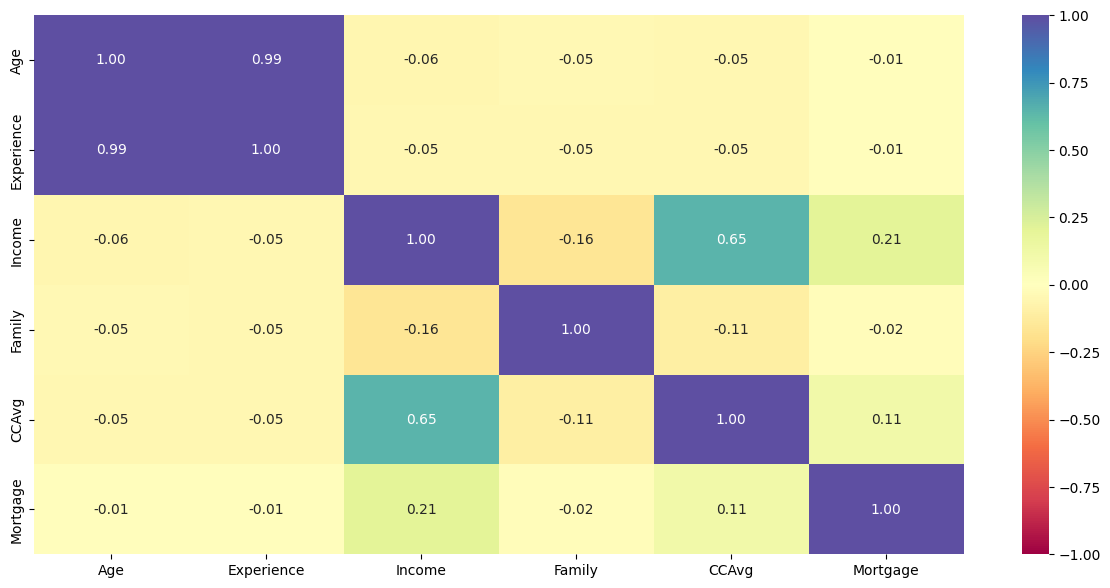

In [ ]:
# Correlation analysis between attributes
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral") # Complete the code to get the heatmap of the data
plt.show()

**Correlation observations:
1.   As expected and for obvious reason, Age and experience are highly correlated
2.   Income and CCAvg (average credit card usage per month) are positively correlated implying high income will lead to higher spending on credit cars
**

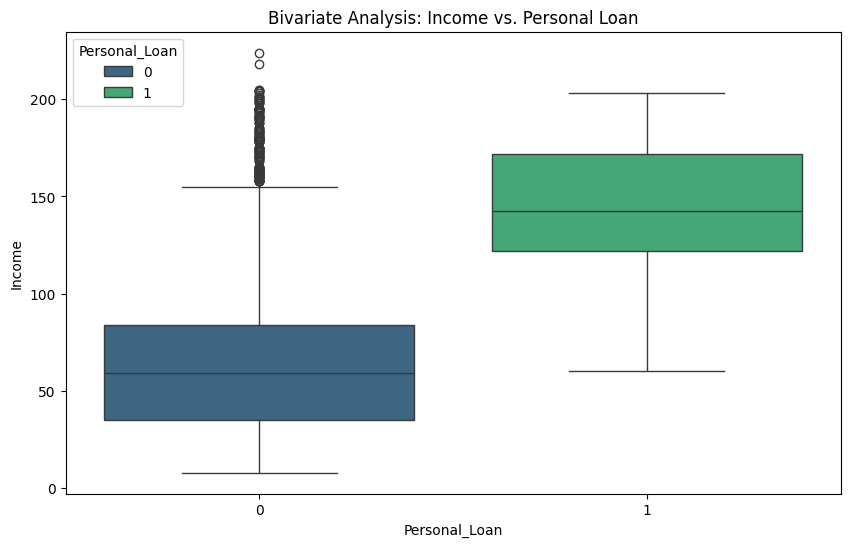

In [ ]:
#Bivariate analysis on how Income effects loan approval
plt.figure(figsize=(10, 6))
sns.boxplot(x='Personal_Loan', y='Income', data=df,hue='Personal_Loan',palette='viridis')
plt.title('Bivariate Analysis: Income vs. Personal Loan')
plt.show()

**For approved loan samples the median income is around 140 K and for rejected loan samples the median income is around 55 K implying that income plays an important role in approving loans.**

In [ ]:
df['Education'].value_counts()

Undergrad       2096
Professional    1501
Graduate        1403
Name: Education, dtype: int64

In [ ]:
def stacked_bar_chart(data, x_variable, y_variable):
    """
    Stacked bar chart for bivariate analysis of two categorical variables

    Parameters:
    - data: DataFrame
    - x_variable: str, column name for the first categorical variable
    - y_variable: str, column name for the second categorical variable
    """
    count = df[x_variable].nunique()
    sorter = df[y_variable].value_counts().index[-1]
    tab1 = pd.crosstab(df[x_variable], df[y_variable], margins=True).sort_values(by=sorter, ascending=False)
    print(tab1)

    plt.figure(figsize=(10, 6))

    # Stacked bar plot
    sns.countplot(x=x_variable, data=data, hue=y_variable, palette='viridis', edgecolor='white')

    # Add labels and title
    plt.xlabel(f'{x_variable} Categories')
    plt.ylabel('Count')
    plt.title(f'Bivariate Analysis: {x_variable} vs {y_variable}')

    # Show the plot
    plt.legend(title=y_variable, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

In [ ]:
def cont_dist_loan(data,predictor,target):
  '''
  function to see personal loan attributes w.r.t continous variables
  data: Dataframe
  predictor: Continous x variable
  target: Personal Loan
  '''
  fig, ax = plt.subplots(figsize=(10, 6))
  sns.kdeplot(data=df, x=predictor, hue=target, fill=True, common_norm=False, palette='viridis', ax=ax)
  ax.set_xlabel(predictor)
  ax.set_ylabel('Density')
  ax.set_title(f'{predictor} Distribution by Personal Loan')
  plt.show()

Personal_Loan     0    1   All
Education                     
All            4520  480  5000
Professional   1296  205  1501
Graduate       1221  182  1403
Undergrad      2003   93  2096


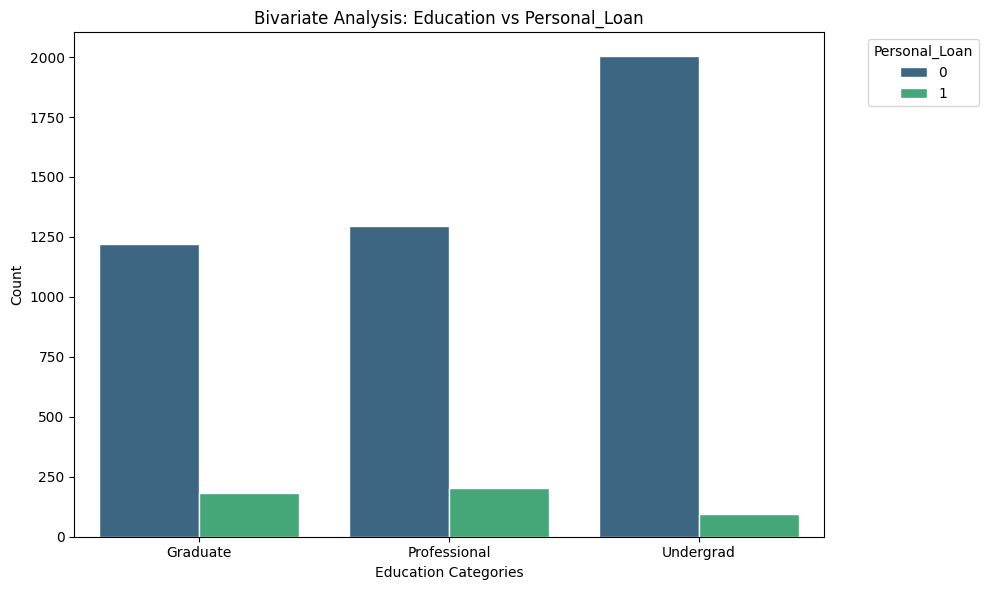

In [ ]:
stacked_bar_chart(df,'Education','Personal_Loan')

Personal_Loan     0    1   All
Family                        
All            4520  480  5000
4              1088  134  1222
3               877  133  1010
1              1365  107  1472
2              1190  106  1296


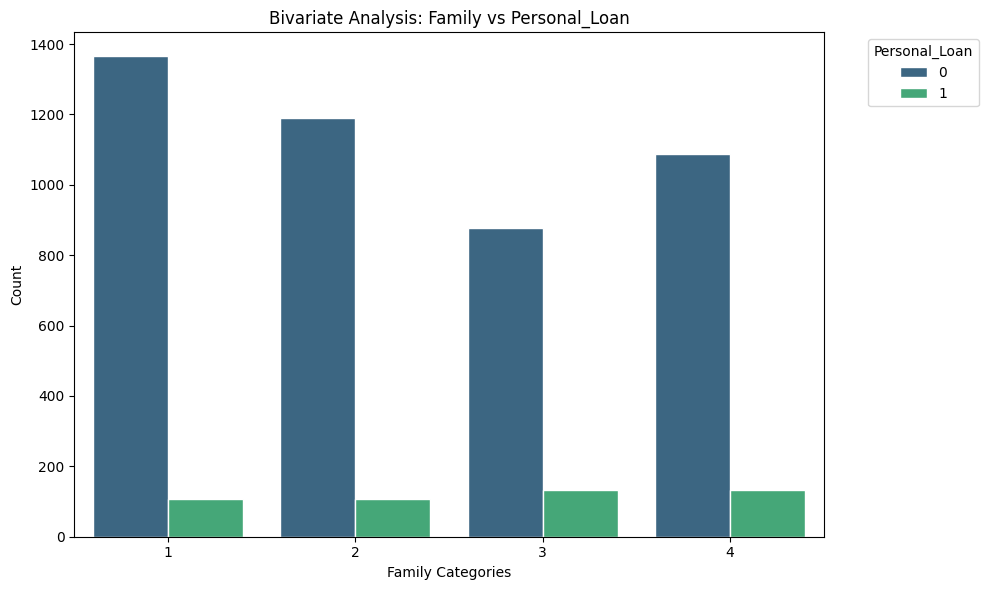

In [ ]:
stacked_bar_chart(df,'Family','Personal_Loan')

Personal_Loan     0    1   All
CreditCard                    
All            4520  480  5000
0              3193  337  3530
1              1327  143  1470


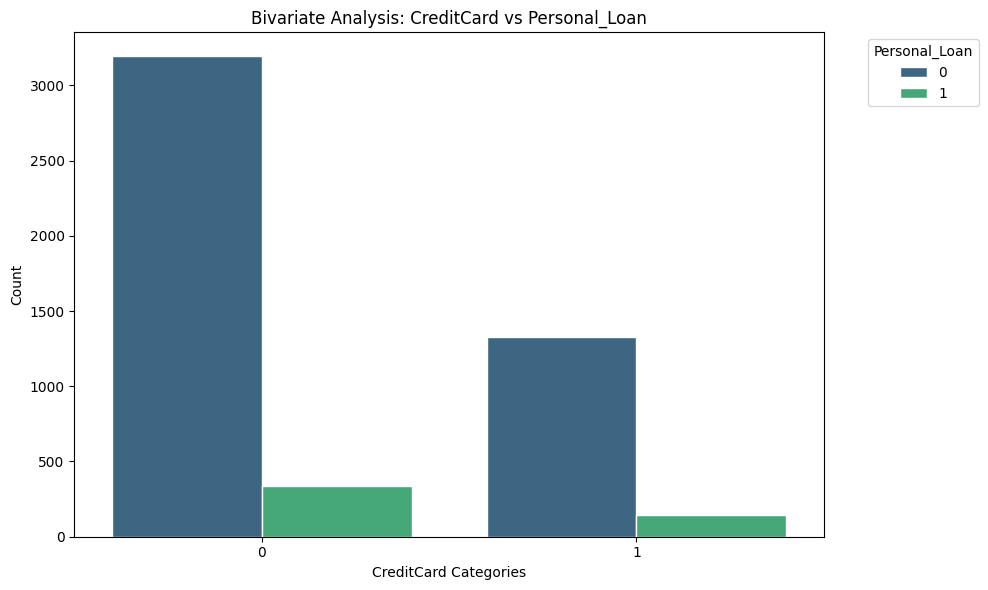

In [ ]:
stacked_bar_chart(df,'CreditCard','Personal_Loan')

Personal_Loan     0    1   All
CD_Account                    
All            4520  480  5000
0              4358  340  4698
1               162  140   302


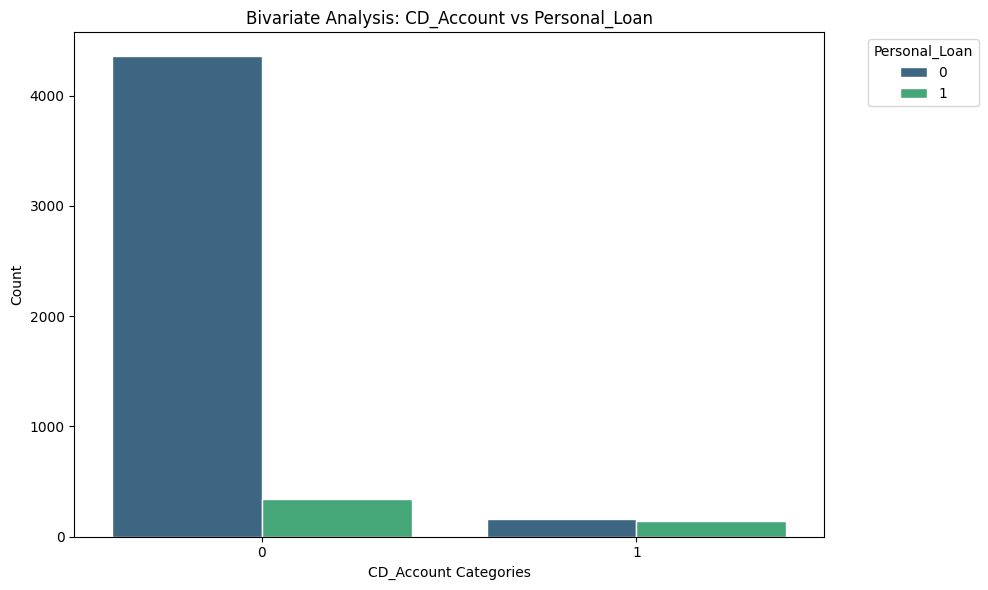

In [ ]:
stacked_bar_chart(df,'CD_Account','Personal_Loan')

Personal_Loan     0    1   All
Online                        
All            4520  480  5000
1              2693  291  2984
0              1827  189  2016


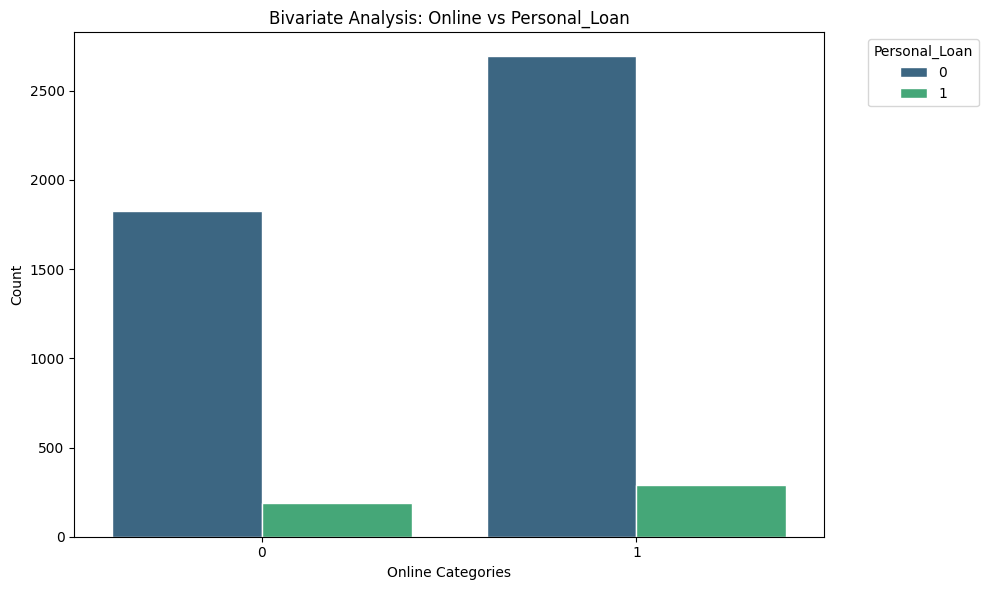

In [ ]:
stacked_bar_chart(df,'Online','Personal_Loan')

Personal_Loan     0    1   All
ZIPCode                       
All            4520  480  5000
94             1334  138  1472
92              894   94   988
95              735   80   815
90              636   67   703
91              510   55   565
93              374   43   417
96               37    3    40


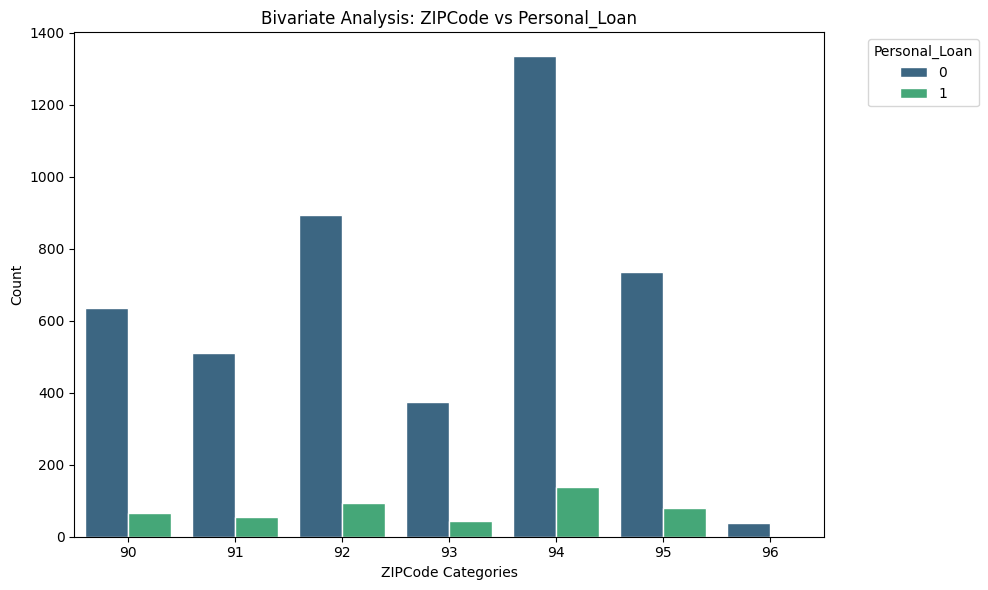

In [ ]:
stacked_bar_chart(df,'ZIPCode','Personal_Loan')

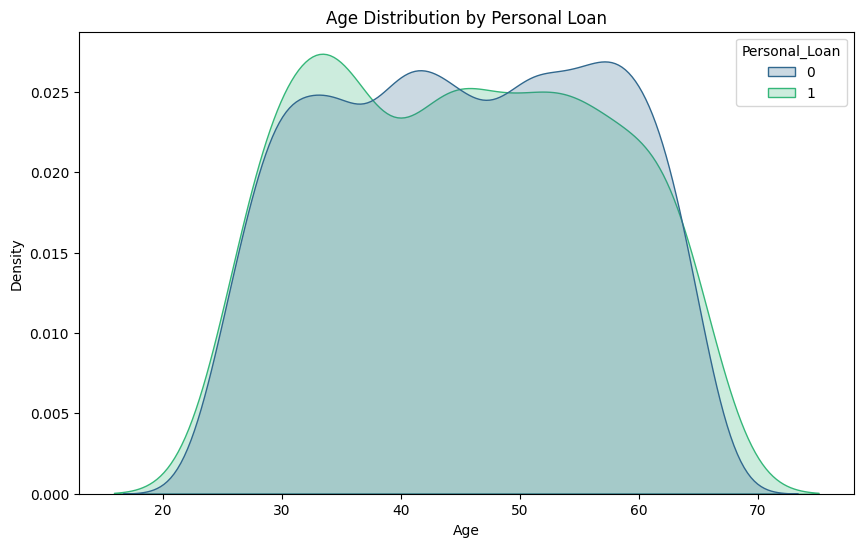

In [ ]:
cont_dist_loan(df,'Age','Personal_Loan')

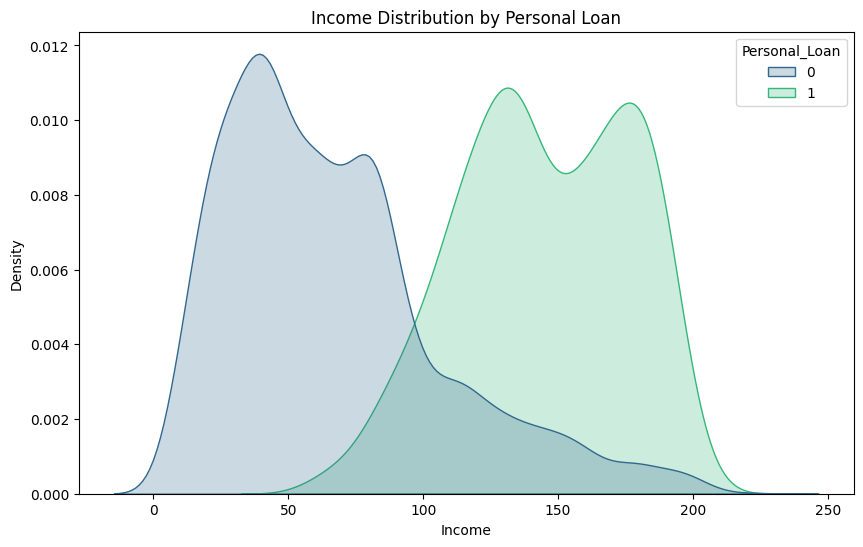

In [ ]:
cont_dist_loan(df,'Income','Personal_Loan')

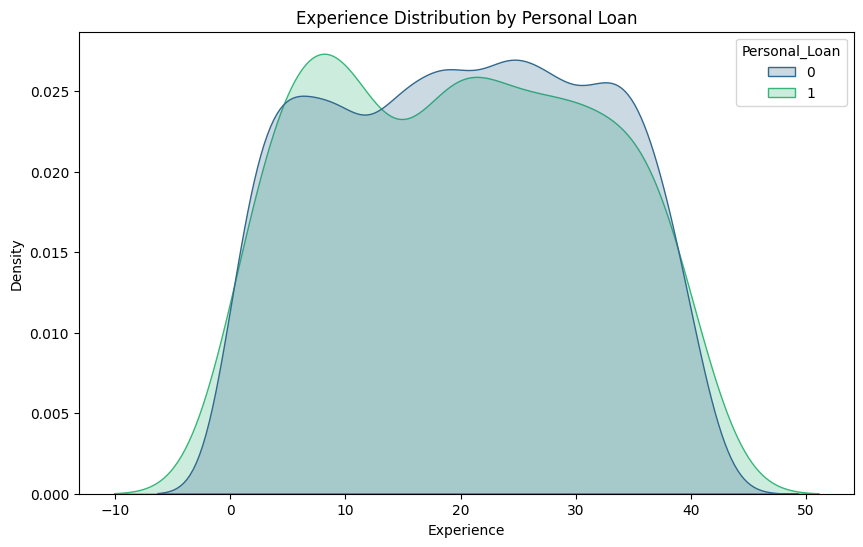

In [ ]:
cont_dist_loan(df,'Experience','Personal_Loan')

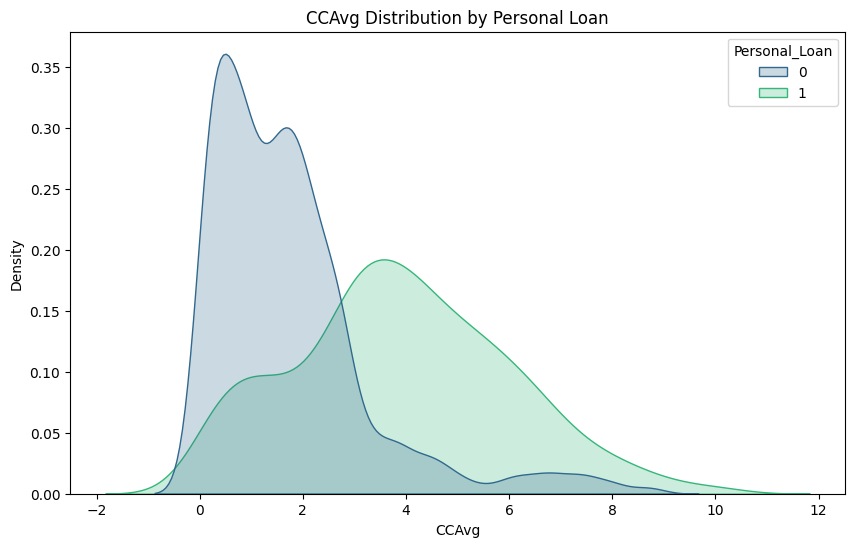

In [ ]:
cont_dist_loan(df,'CCAvg','Personal_Loan')

**Observations**:

**Education and Loan Approval:**
Applicants with professional and graduate education levels exhibit a notably higher percentage of loan approvals compared to those with undergraduate education.

**Certificate of Deposit (CD) Impact:**
Individuals holding a Certificate of Deposit (CD) account demonstrate a significantly higher likelihood of loan approval compared to those without. Remarkably, among those with a CD account, an impressive 86% successfully secured loan approval.

**Significance of Income:**
Income emerges as a pivotal factor influencing loan approval. The analysis underscores the importance of income levels, suggesting a discernible impact on the likelihood of loan approval.

## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

In [ ]:
#Calculating percentage of values that fall below or above bounds
Q1 = df.quantile(.25)
Q3 = df.quantile(.75)

IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

((df.select_dtypes(include=["float64", "int64"]) < lower)
    |(df.select_dtypes(include=["float64", "int64"]) > upper)
).sum() / len(df) * 100

<ipython-input-157-831a73047b4b>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df.quantile(.25)
<ipython-input-157-831a73047b4b>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df.quantile(.75)


Age           0.00
Experience    0.00
Income        1.92
Family        0.00
CCAvg         6.48
Mortgage      5.82
dtype: float64

**Data Preparation and splitting**

Objective: Predict if a liability customer will purchase personal loans.

Data Splitting: Divide the dataset into training, testing, and validation sets.
Enables evaluation of the model on distinct datasets.

Data Preprocessing: Encode categorical features to ensure the model understands non-numeric variables.
Scale numerical values to maintain a consistent range, preventing dominance of specific features.

Model Building: Utilize the training data to construct the predictive model.

Performance Evaluation: Assess the model's performance by testing it on a separate test set.
Ensures the model generalizes well to new, unseen data.

In [ ]:
#Assign independent and dependent variable to X and Y
X = df.drop(['Personal_Loan','Experience'],axis=1)
y = df['Personal_Loan']

In [ ]:
#Apply one hot encoding on Zipcode and Education
X = pd.get_dummies(X,columns=['Education','ZIPCode'],drop_first=True)

In [ ]:
#Train test splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [ ]:
#Seeing the records split and the target variable
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)

print("Value Counts for 'Personal_Loan' in training set:")
print(y_train.value_counts(normalize=True))
print("Value Counts for 'Personal_Loan' in testing set:")
print(y_test.value_counts(normalize=True))

Shape of X_train: (3500, 17)
Shape of X_test: (1500, 17)
Value Counts for 'Personal_Loan' in training set:
0    0.905429
1    0.094571
Name: Personal_Loan, dtype: float64
Value Counts for 'Personal_Loan' in testing set:
0    0.900667
1    0.099333
Name: Personal_Loan, dtype: float64


## Model Building

### Model Evaluation Criterion

Potential Model Errors:

**False Positive**: Predicting a customer will take a personal loan, but they don't. Result: Loss of resources.

**False Negative**: Predicting a customer won't take a personal loan, but they would have. Result: Loss of opportunity.

**Priority**: The priority is to minimize the loss associated with falsely predicting that a customer won't take a personal loan when, in reality, they would have.

**Importance**: Losing a potential customer due to a false negative is deemed more important as it results in a missed opportunity.

**Strategy to Reduce Loss**: To minimize this loss, the focus should be on increasing the Recall of the model.
Maximizing Recall reduces the chances of false negatives, ensuring that more actual positive instances are correctly identified.


In summary, prioritizing Recall is essential for the business, as it directly addresses the more significant concern of missing out on potential customers who would have taken a personal loan. This strategic emphasis on minimizing false negatives aligns with the goal of optimizing opportunities and maximizing the effectiveness of marketing efforts.

### Model Building

In [ ]:
def evaluate_classification_model(model, predictors, target):
    """
    Evaluate the performance of a classification model.

    Parameters:
    - model: DecisionTreeClassifier
    - predictors: DataFrame containing independent variables
    - target: Series containing the dependent variable

    Returns:
    - Dictionary of metrics (accuracy, precision, recall, f1-score, confusion matrix)
    """

    # Make predictions on the test set
    pred = model.predict(predictors)

    # Compute metrics
    accuracy = accuracy_score(target, pred)
    precision = precision_score(target, pred)
    recall = recall_score(target, pred)
    f1 = f1_score(target, pred)


    # Create a dictionary of metrics
    metrics = pd.DataFrame({
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
        },index=[0])

    return metrics

In [ ]:
def confusion_matrix(model, predictors, target):
  '''
  Confusion matrix visualization
  Parameters:
    - model: DecisionTreeClassifier
    - predictors: DataFrame containing independent variables
    - target: Series containing the dependent variable
  '''
  pred = model.predict(predictors)
  cm_df = pd.crosstab(target, pred, rownames=['Actual'], colnames=['Predicted'])
  # Plot the formatted confusion matrix using seaborn
  plt.figure(figsize=(3, 2))
  sns.heatmap(cm_df, annot=True, fmt='g', cmap='Blues')
  plt.title('Confusion Matrix')
  plt.show()




In [ ]:
Org_Tree = DecisionTreeClassifier(criterion='gini',random_state=1)
Org_Tree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=1)

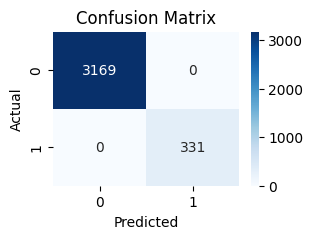

In [ ]:
confusion_matrix(Org_Tree, X_train, y_train)

In [ ]:
#Model performance on training data
dTree_perf_train = evaluate_classification_model(Org_Tree, X_train, y_train)
dTree_perf_train

,Accuracy,Precision,Recall,F1-Score
0,1.0,1.0,1.0,1.0


**Decision Tree Structure**

In [ ]:
feature_names = list(X_train.columns)
print(feature_names)

['Age', 'Income', 'Family', 'CCAvg', 'Mortgage', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard', 'Education_Professional', 'Education_Undergrad', 'ZIPCode_91', 'ZIPCode_92', 'ZIPCode_93', 'ZIPCode_94', 'ZIPCode_95', 'ZIPCode_96']


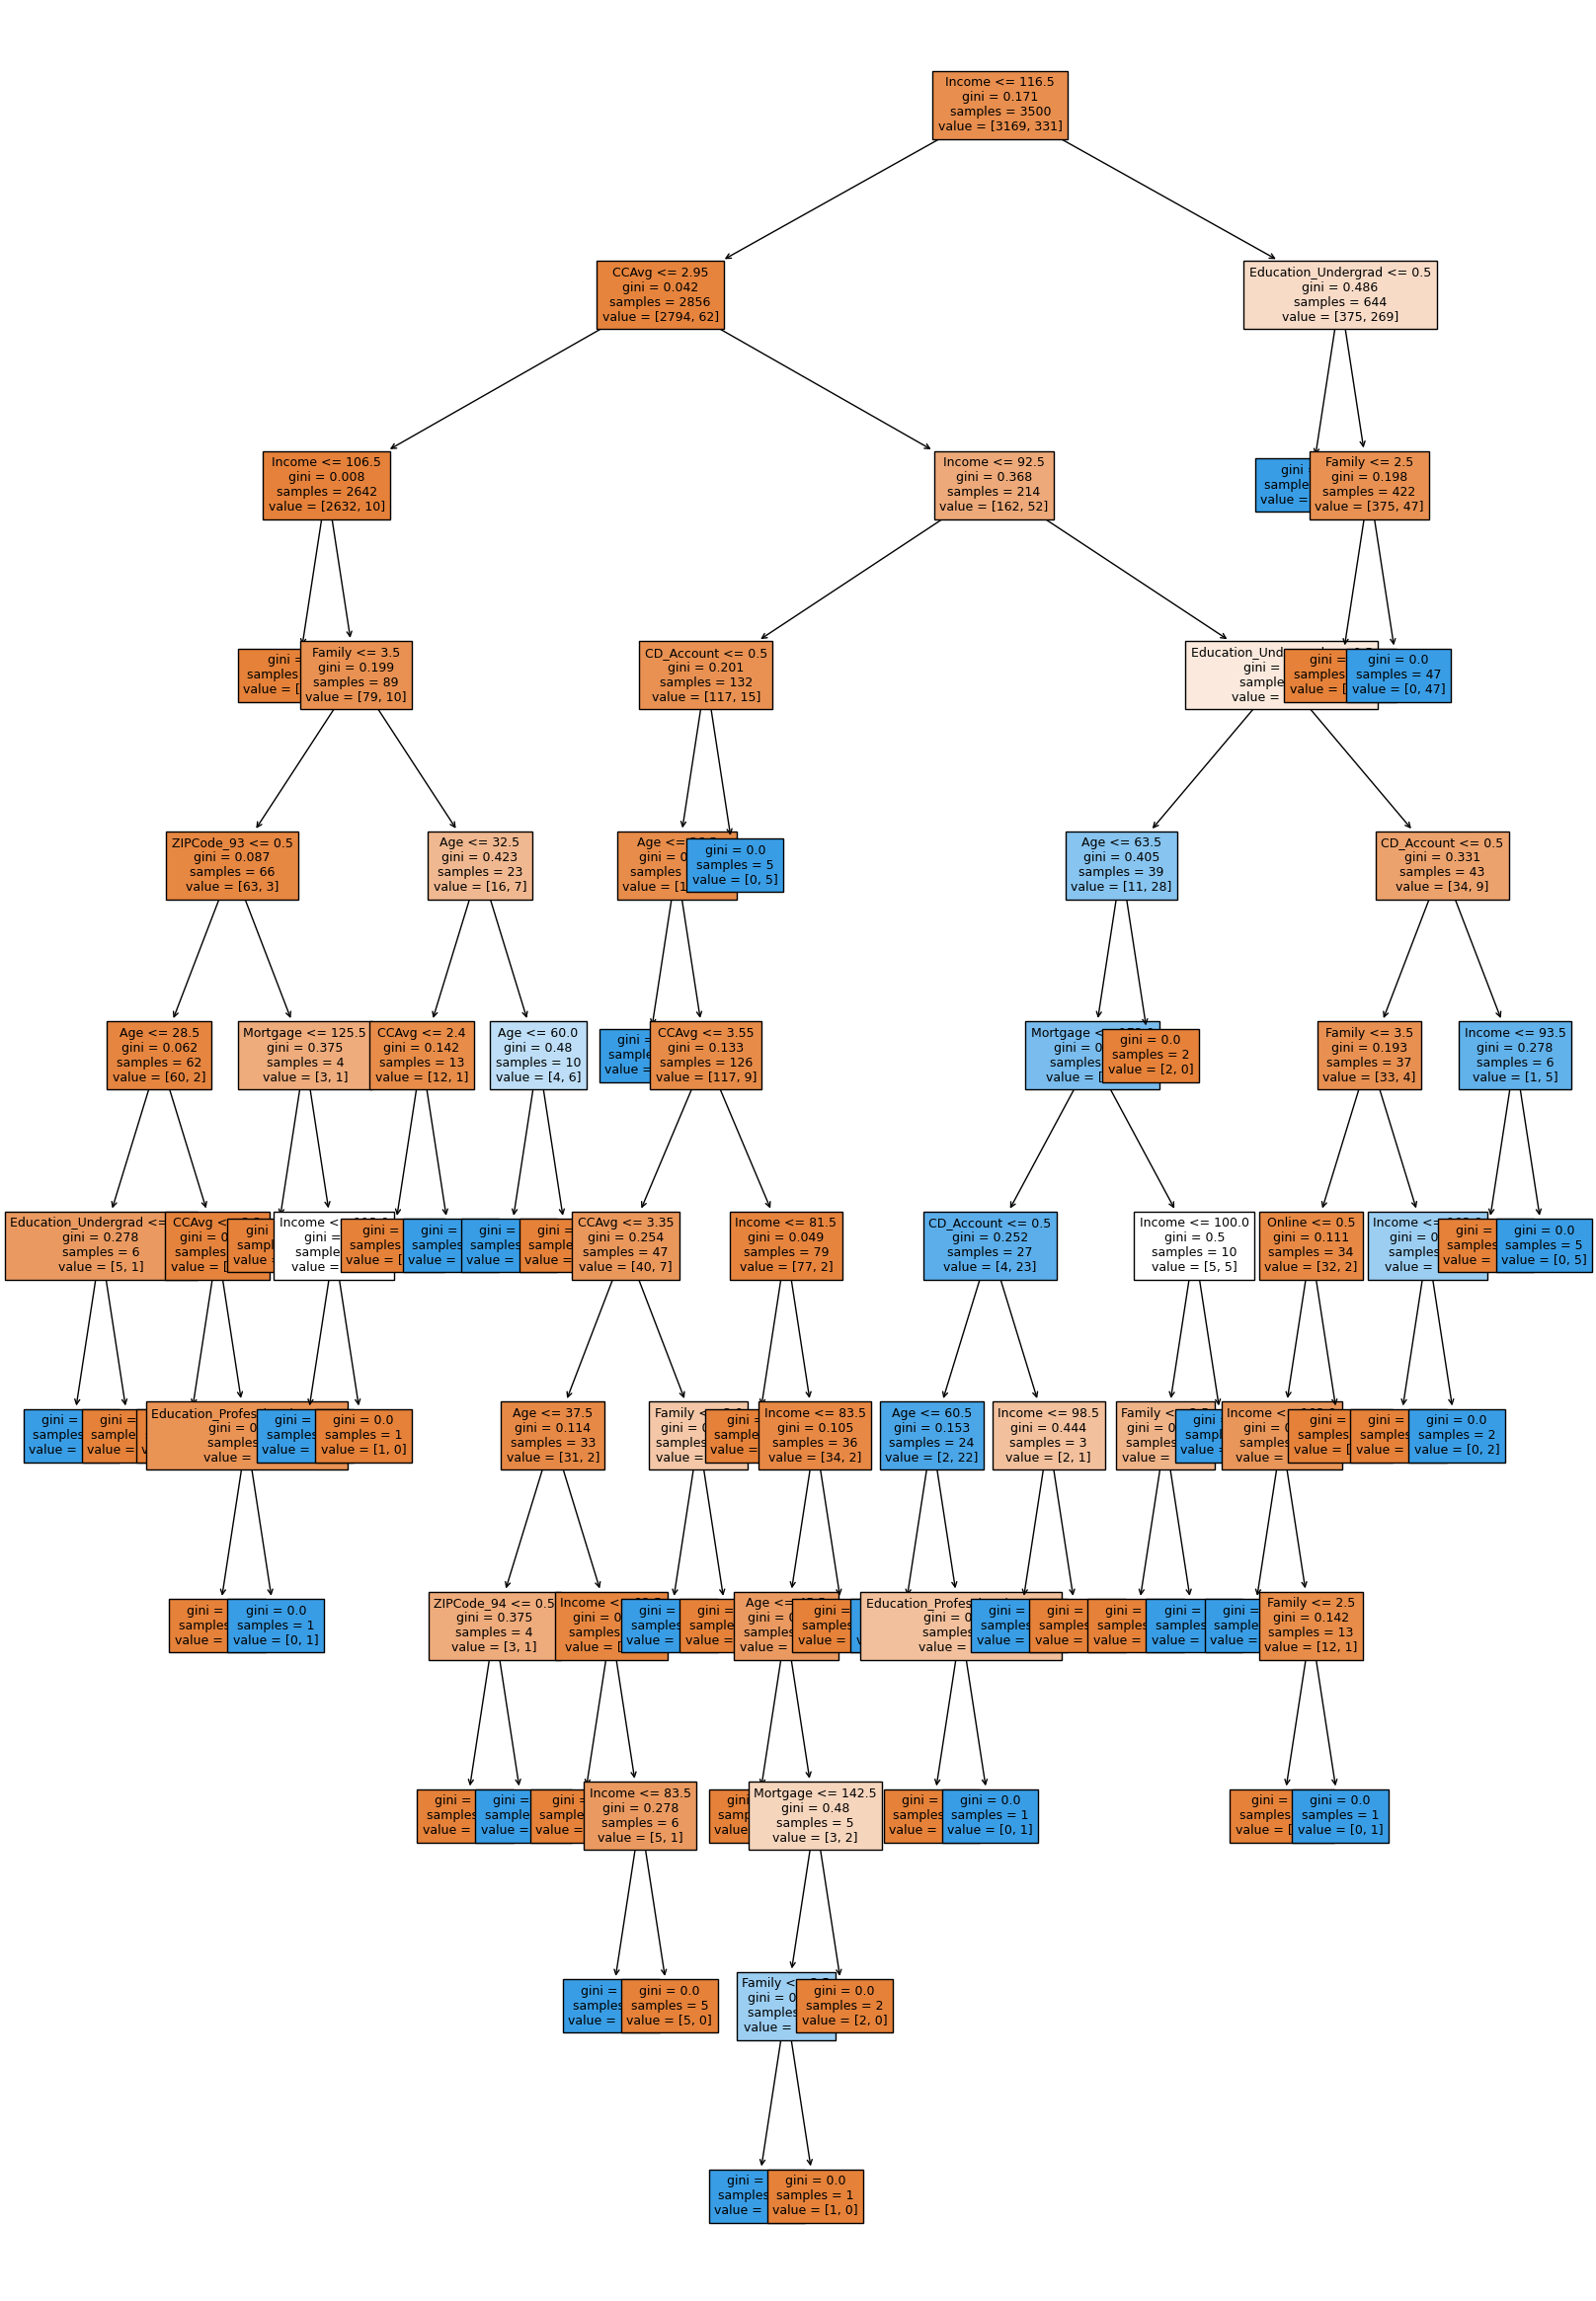

In [ ]:
plt.figure(figsize=(20, 30))
out = tree.plot_tree(
    Org_Tree,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [ ]:
print(tree.export_text(Org_Tree, feature_names=feature_names, show_weights=True))

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2553.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- Family <= 3.50
|   |   |   |   |--- ZIPCode_93 <= 0.50
|   |   |   |   |   |--- Age <= 28.50
|   |   |   |   |   |   |--- Education_Undergrad <= 0.50
|   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |   |--- Education_Undergrad >  0.50
|   |   |   |   |   |   |   |--- weights: [5.00, 0.00] class: 0
|   |   |   |   |   |--- Age >  28.50
|   |   |   |   |   |   |--- CCAvg <= 2.20
|   |   |   |   |   |   |   |--- weights: [48.00, 0.00] class: 0
|   |   |   |   |   |   |--- CCAvg >  2.20
|   |   |   |   |   |   |   |--- Education_Professional <= 0.50
|   |   |   |   |   |   |   |   |--- weights: [7.00, 0.00] class: 0
|   |   |   |   |   |   |   |--- Education_Professional >  0.50
|   |   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |--- ZIPCode_93 >  0.50

In [ ]:
importances = Org_Tree.feature_importances_

# Create a DataFrame with feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the DataFrame
print("Feature Importances:")
print(feature_importance_df)

Feature Importances:
                   Feature  Importance
10     Education_Undergrad    0.403732
1                   Income    0.317094
2                   Family    0.167368
3                    CCAvg    0.045621
0                      Age    0.026044
6               CD_Account    0.025711
4                 Mortgage    0.005628
9   Education_Professional    0.005144
14              ZIPCode_94    0.002503
13              ZIPCode_93    0.000594
7                   Online    0.000561
15              ZIPCode_95    0.000000
8               CreditCard    0.000000
12              ZIPCode_92    0.000000
11              ZIPCode_91    0.000000
5       Securities_Account    0.000000
16              ZIPCode_96    0.000000


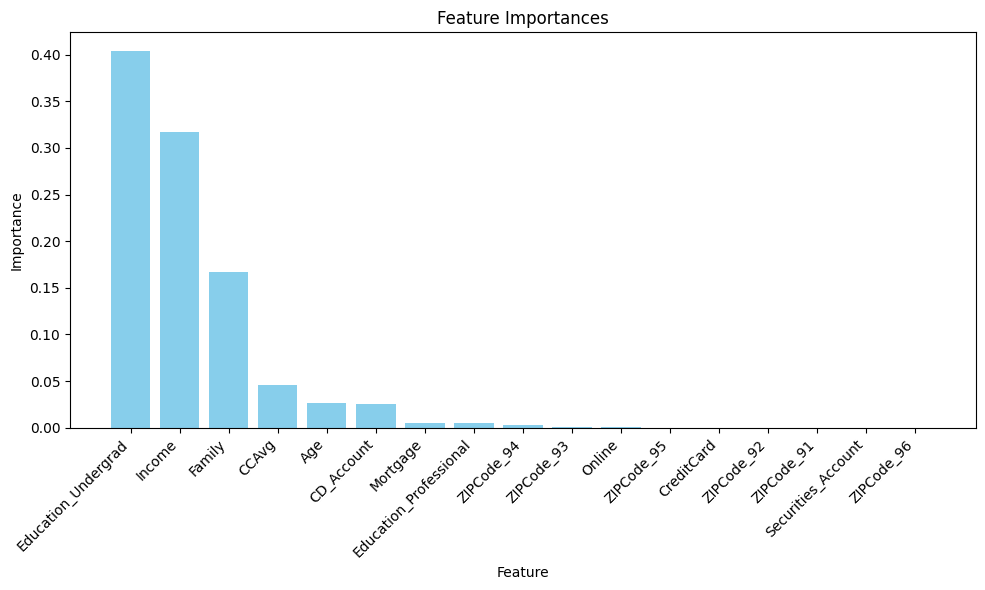

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Performance on test data**

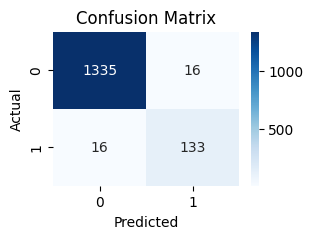

In [ ]:
confusion_matrix(Org_Tree, X_test, y_test)

In [ ]:
#Model Performance on test data
dTree_perf_test= evaluate_classification_model(Org_Tree, X_test, y_test)
dTree_perf_test

,Accuracy,Precision,Recall,F1-Score
0,0.978667,0.892617,0.892617,0.892617


### Model Performance Improvement

**Pre-pruning**

Pre-pruning in a decision tree classifier involves setting constraints on the tree-building process before it reaches its full depth. Instead of expanding the tree until all leaves are pure or no further splits are possible, pre-pruning enforces limitations based on criteria such as maximum depth, minimum samples per leaf, or minimum impurity decrease. This helps prevent overfitting by stopping the tree from becoming overly complex, improving generalization to unseen data.

In [ ]:
Pre_Tree = DecisionTreeClassifier(random_state=1)

# Define the parameter grid to search
param_grid = {
    "max_depth": np.arange(5, 15),
    "min_samples_leaf": [1, 2, 5, 7, 10],
    "max_leaf_nodes": [2, 3, 5, 10],
}

acc_scorer = make_scorer(recall_score)

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=Pre_Tree, param_grid=param_grid, cv=5, scoring=acc_scorer)

# Fit the model to the data
grid_search = grid_search.fit(X_train, y_train)

# Print the best parameters and corresponding accuracy
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

Best Parameters: {'max_depth': 5, 'max_leaf_nodes': 10, 'min_samples_leaf': 1}
Best Accuracy: 0.9092265943012212


In [ ]:
Pre_Tree = grid_search.best_estimator_
Pre_Tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=10, random_state=1)

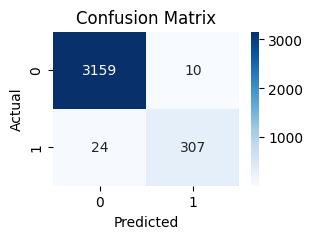

In [ ]:
confusion_matrix(Pre_Tree,X_train,y_train)

In [ ]:
dTree_pre_perf_train= evaluate_classification_model(Pre_Tree, X_train, y_train)
dTree_pre_perf_train

,Accuracy,Precision,Recall,F1-Score
0,0.990286,0.968454,0.927492,0.947531


**Prepruned Decision Tree Structure**

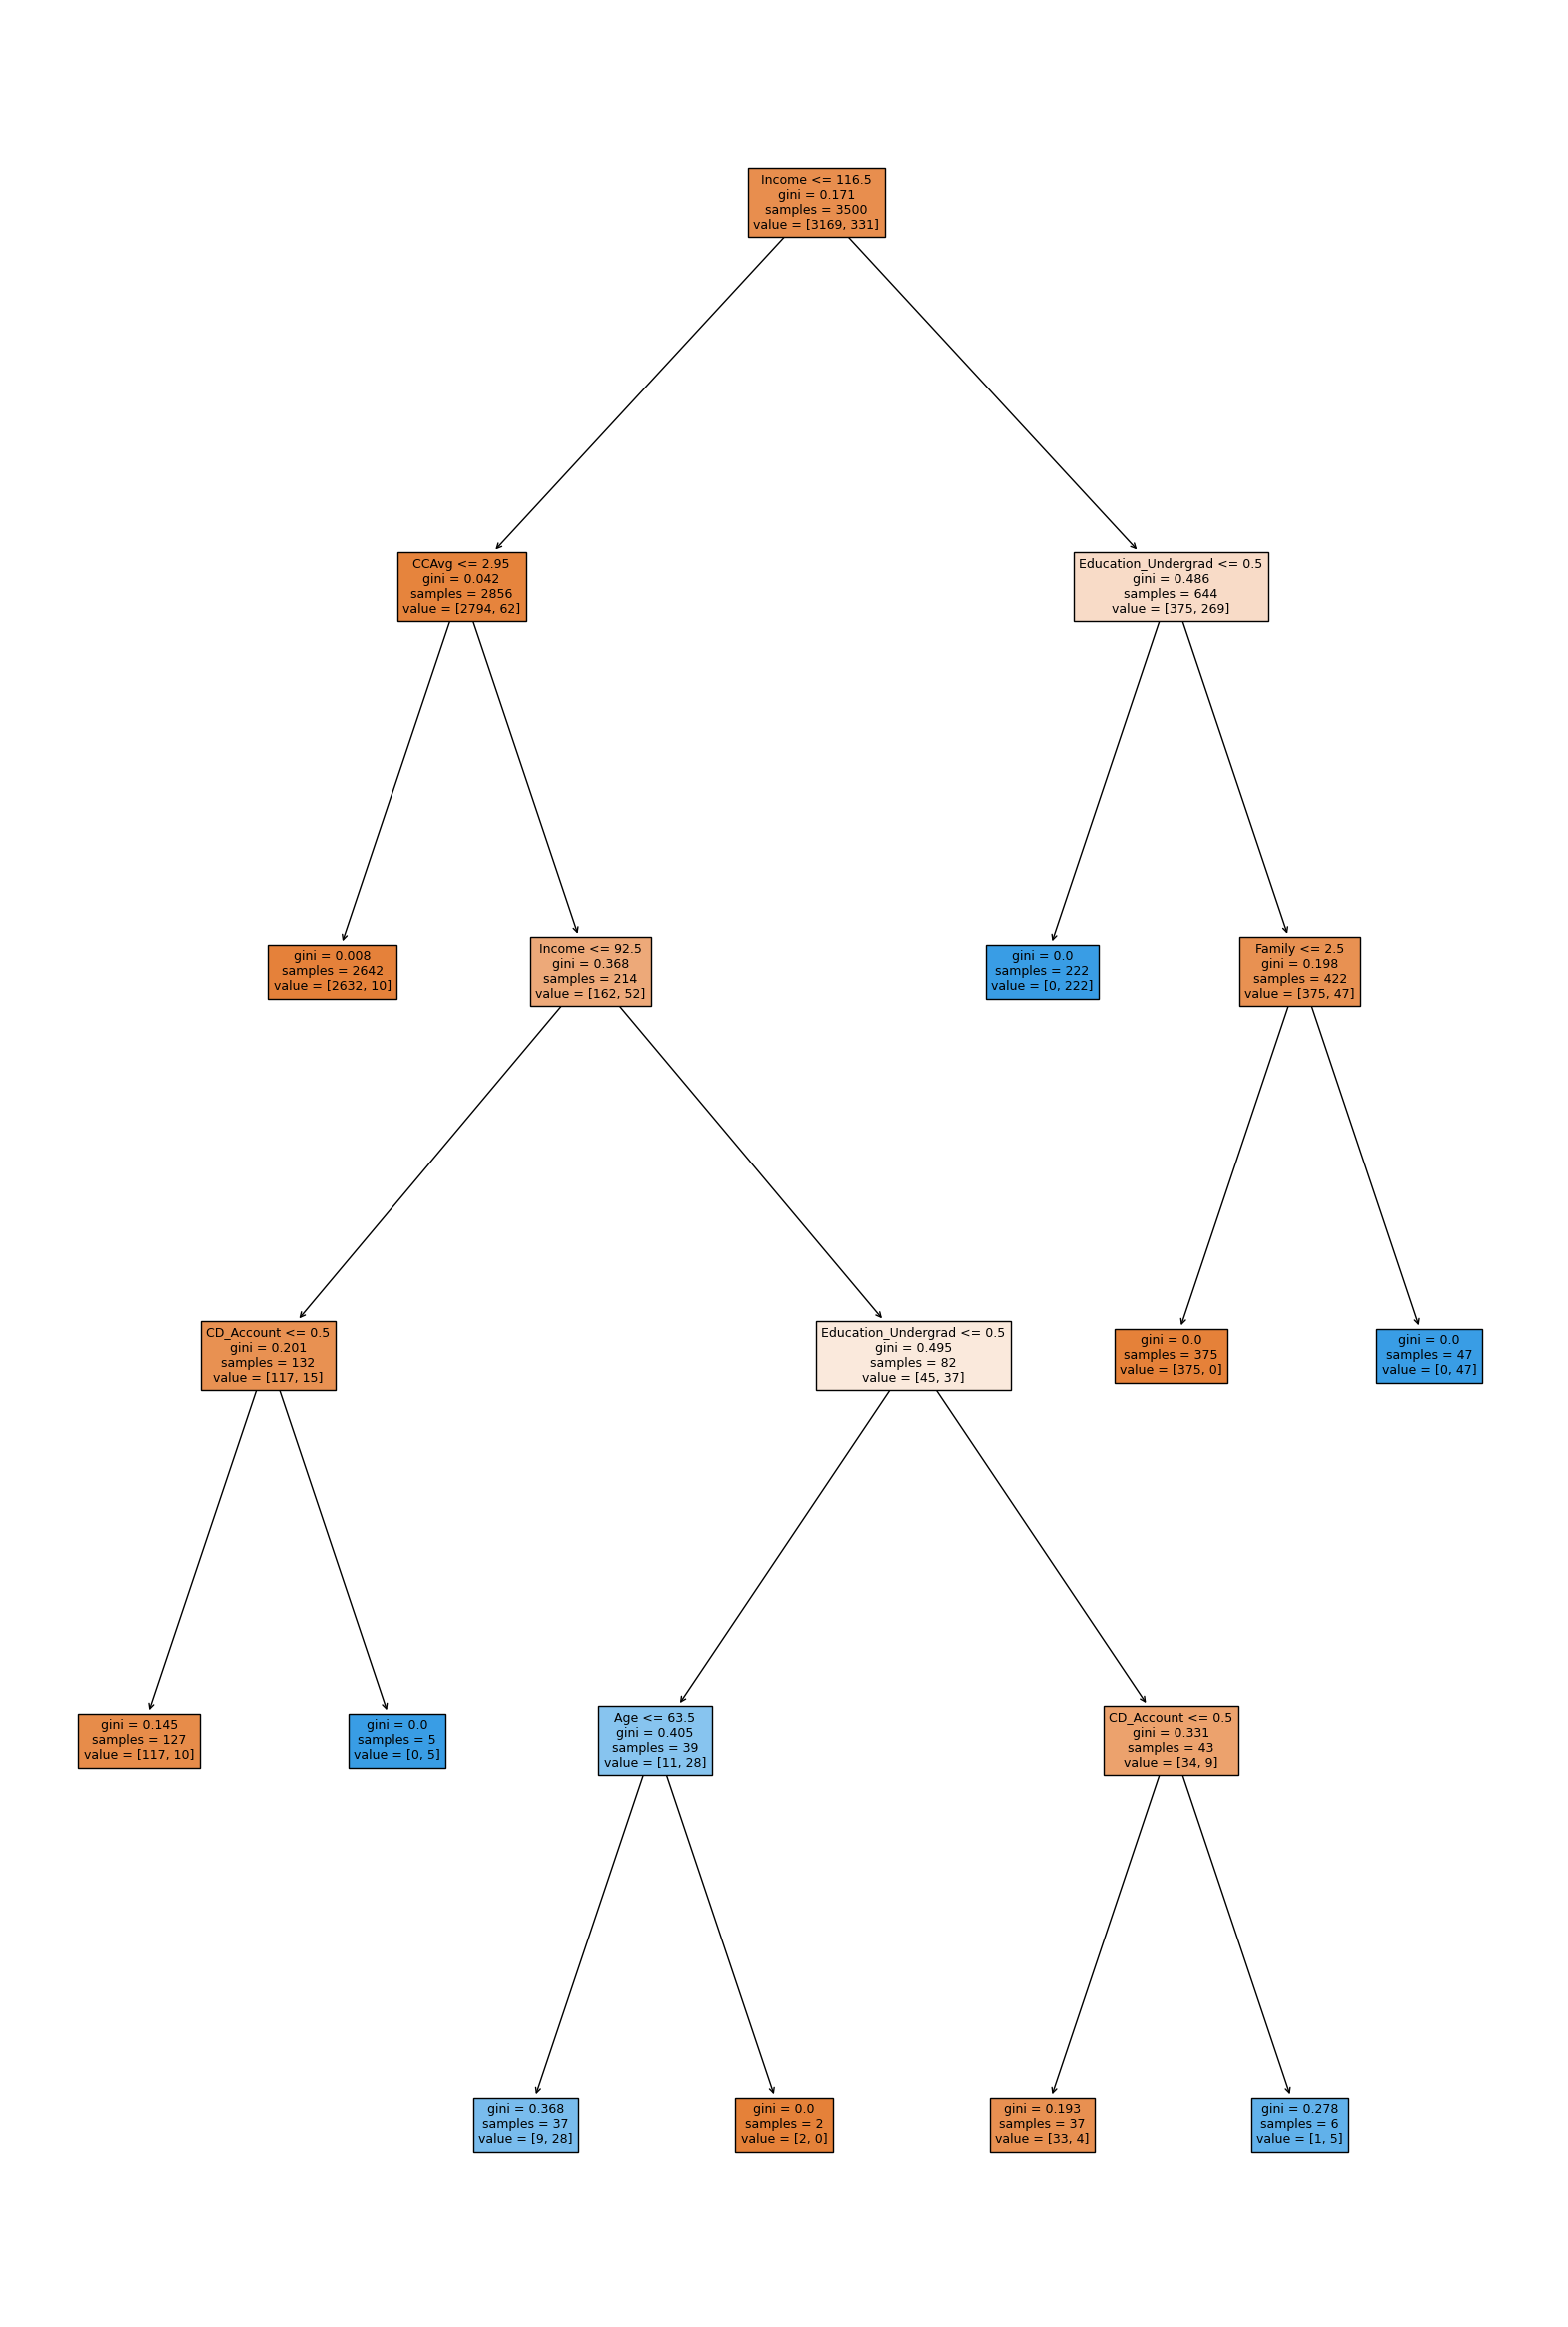

In [ ]:
plt.figure(figsize=(20, 30))
out = tree.plot_tree(
    Pre_Tree,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [ ]:
print(tree.export_text(Pre_Tree, feature_names=feature_names, show_weights=True))

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [2632.00, 10.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- Income <= 92.50
|   |   |   |--- CD_Account <= 0.50
|   |   |   |   |--- weights: [117.00, 10.00] class: 0
|   |   |   |--- CD_Account >  0.50
|   |   |   |   |--- weights: [0.00, 5.00] class: 1
|   |   |--- Income >  92.50
|   |   |   |--- Education_Undergrad <= 0.50
|   |   |   |   |--- Age <= 63.50
|   |   |   |   |   |--- weights: [9.00, 28.00] class: 1
|   |   |   |   |--- Age >  63.50
|   |   |   |   |   |--- weights: [2.00, 0.00] class: 0
|   |   |   |--- Education_Undergrad >  0.50
|   |   |   |   |--- CD_Account <= 0.50
|   |   |   |   |   |--- weights: [33.00, 4.00] class: 0
|   |   |   |   |--- CD_Account >  0.50
|   |   |   |   |   |--- weights: [1.00, 5.00] class: 1
|--- Income >  116.50
|   |--- Education_Undergrad <= 0.50
|   |   |--- weights: [0.00, 222.00] class: 1
|   |--- Education_Undergrad >  0.50
|   |   |--- Family <= 2.50
|   |   |   |

In [ ]:
importances = Pre_Tree.feature_importances_

# Create a DataFrame with feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the DataFrame
print("Feature Importances:")
print(feature_importance_df)

Feature Importances:
                   Feature  Importance
10     Education_Undergrad    0.446191
1                   Income    0.327387
2                   Family    0.155083
3                    CCAvg    0.042061
6               CD_Account    0.025243
0                      Age    0.004035
11              ZIPCode_91    0.000000
15              ZIPCode_95    0.000000
14              ZIPCode_94    0.000000
13              ZIPCode_93    0.000000
12              ZIPCode_92    0.000000
8               CreditCard    0.000000
9   Education_Professional    0.000000
7                   Online    0.000000
5       Securities_Account    0.000000
4                 Mortgage    0.000000
16              ZIPCode_96    0.000000


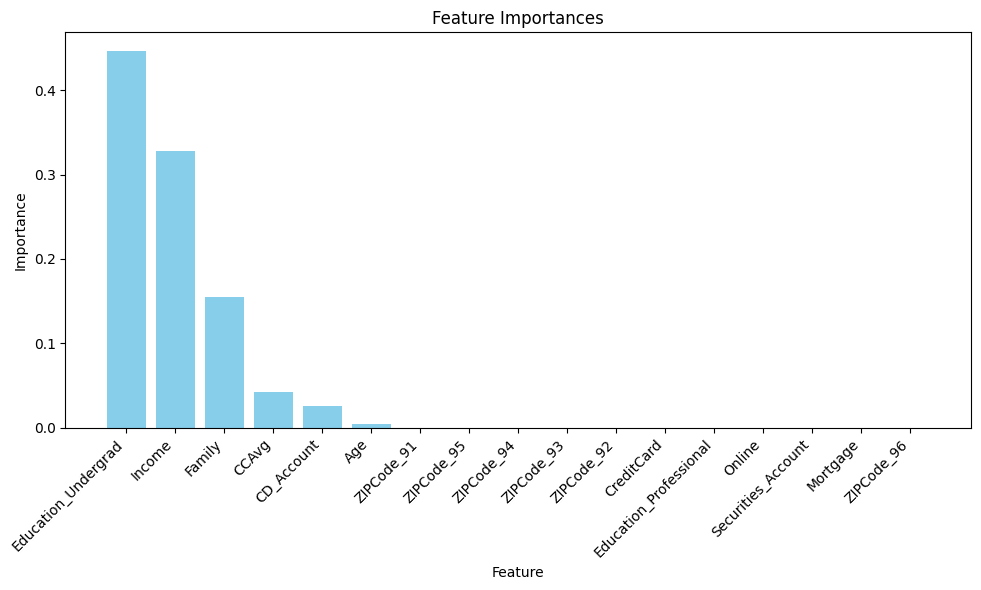

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Performance on test data**

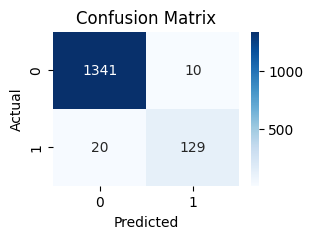

In [ ]:
confusion_matrix(Pre_Tree, X_test, y_test)

In [ ]:
dTree_pre_perf_test= evaluate_classification_model(Pre_Tree, X_test, y_test)
dTree_pre_perf_test

,Accuracy,Precision,Recall,F1-Score
0,0.98,0.928058,0.865772,0.895833


**Cost Complexity Pruning**

Cost complexity pruning, also known as "post-pruning" or "pruning with cost complexity," involves fine-tuning a decision tree after it has been fully grown. It introduces a cost parameter that balances the complexity of the tree with its accuracy on the training data. The algorithm iteratively prunes branches with the least increase in cost, helping to find an optimal balance between model simplicity and performance. This process aims to enhance the tree's generalization ability on new, unseen data by preventing overfitting.

In [ ]:
Cost_Tree = DecisionTreeClassifier(random_state=1)

In [ ]:
path = Cost_Tree.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [ ]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000,0.000000
1,0.000214,0.000429
2,0.000223,0.001542
3,0.000242,0.002750
4,0.000268,0.003824
5,0.000359,0.004900
6,0.000381,0.005280
7,0.000381,0.005661
8,0.000381,0.006042
9,0.000476,0.006519


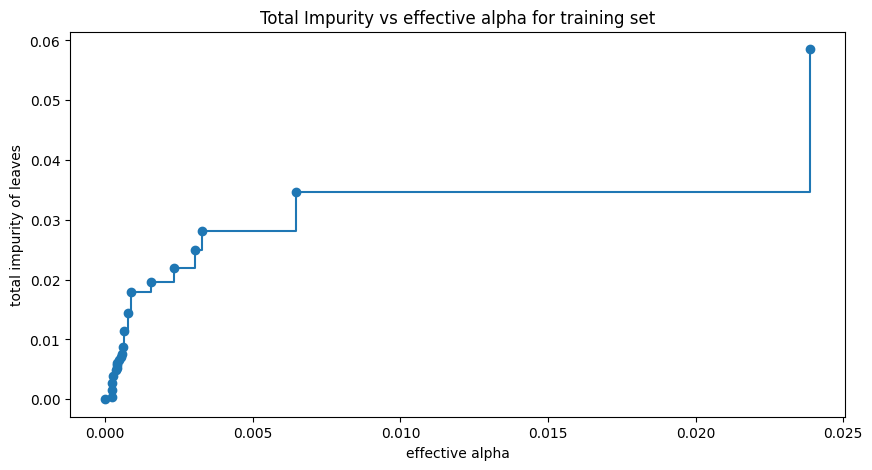

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [ ]:
clfs = []

for ccp_alpha in ccp_alphas:
  clf = DecisionTreeClassifier(random_state=1,ccp_alpha=ccp_alpha)
  clf.fit(X_train, y_train)
  clfs.append(clf)

print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(clfs[-1].tree_.node_count, ccp_alphas[-1]))


Number of nodes in the last tree is: 1 with ccp_alpha: 0.056364969335601575


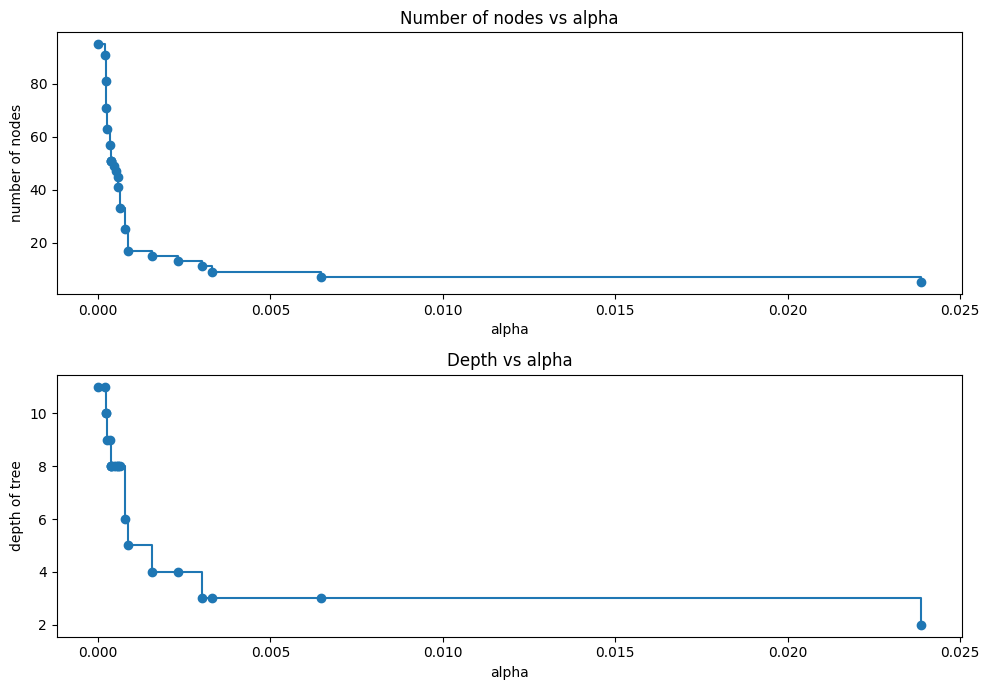

In [ ]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

**Recall Score in comparison to Alpha for training and testing data**

In [ ]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

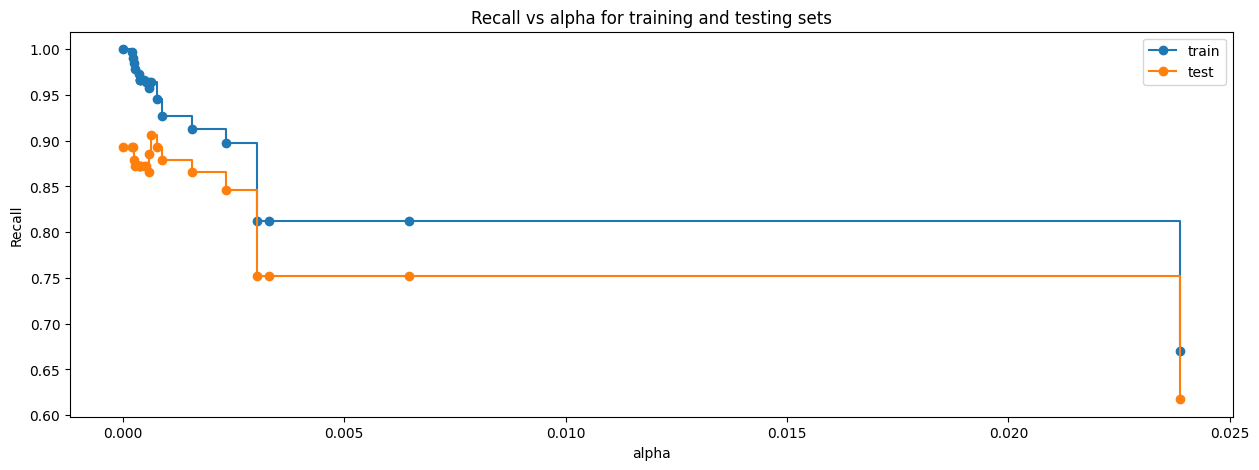

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.0006414326414326415, random_state=1)


**Post Pruning**

In [ ]:
best_ccp_alpha = best_model.ccp_alpha

In [ ]:
#Modelling the tree with the best ccp_alpha
Post_Tree = DecisionTreeClassifier(ccp_alpha=best_ccp_alpha, class_weight={0: 0.15, 1: 0.85}, random_state=1)
Post_Tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0006414326414326415,
                       class_weight={0: 0.15, 1: 0.85}, random_state=1)

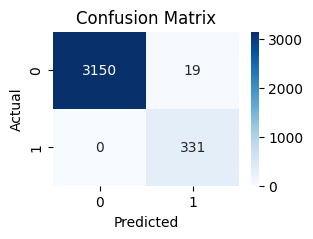

In [ ]:
confusion_matrix(Post_Tree,X_train,y_train)

In [ ]:
#Performance check on train dataset
dTree_post_perf_train= evaluate_classification_model(Post_Tree, X_train, y_train)
dTree_post_perf_train

,Accuracy,Precision,Recall,F1-Score
0,0.994571,0.945714,1.0,0.9721


**Post-Pruned Decision Tree Structure**

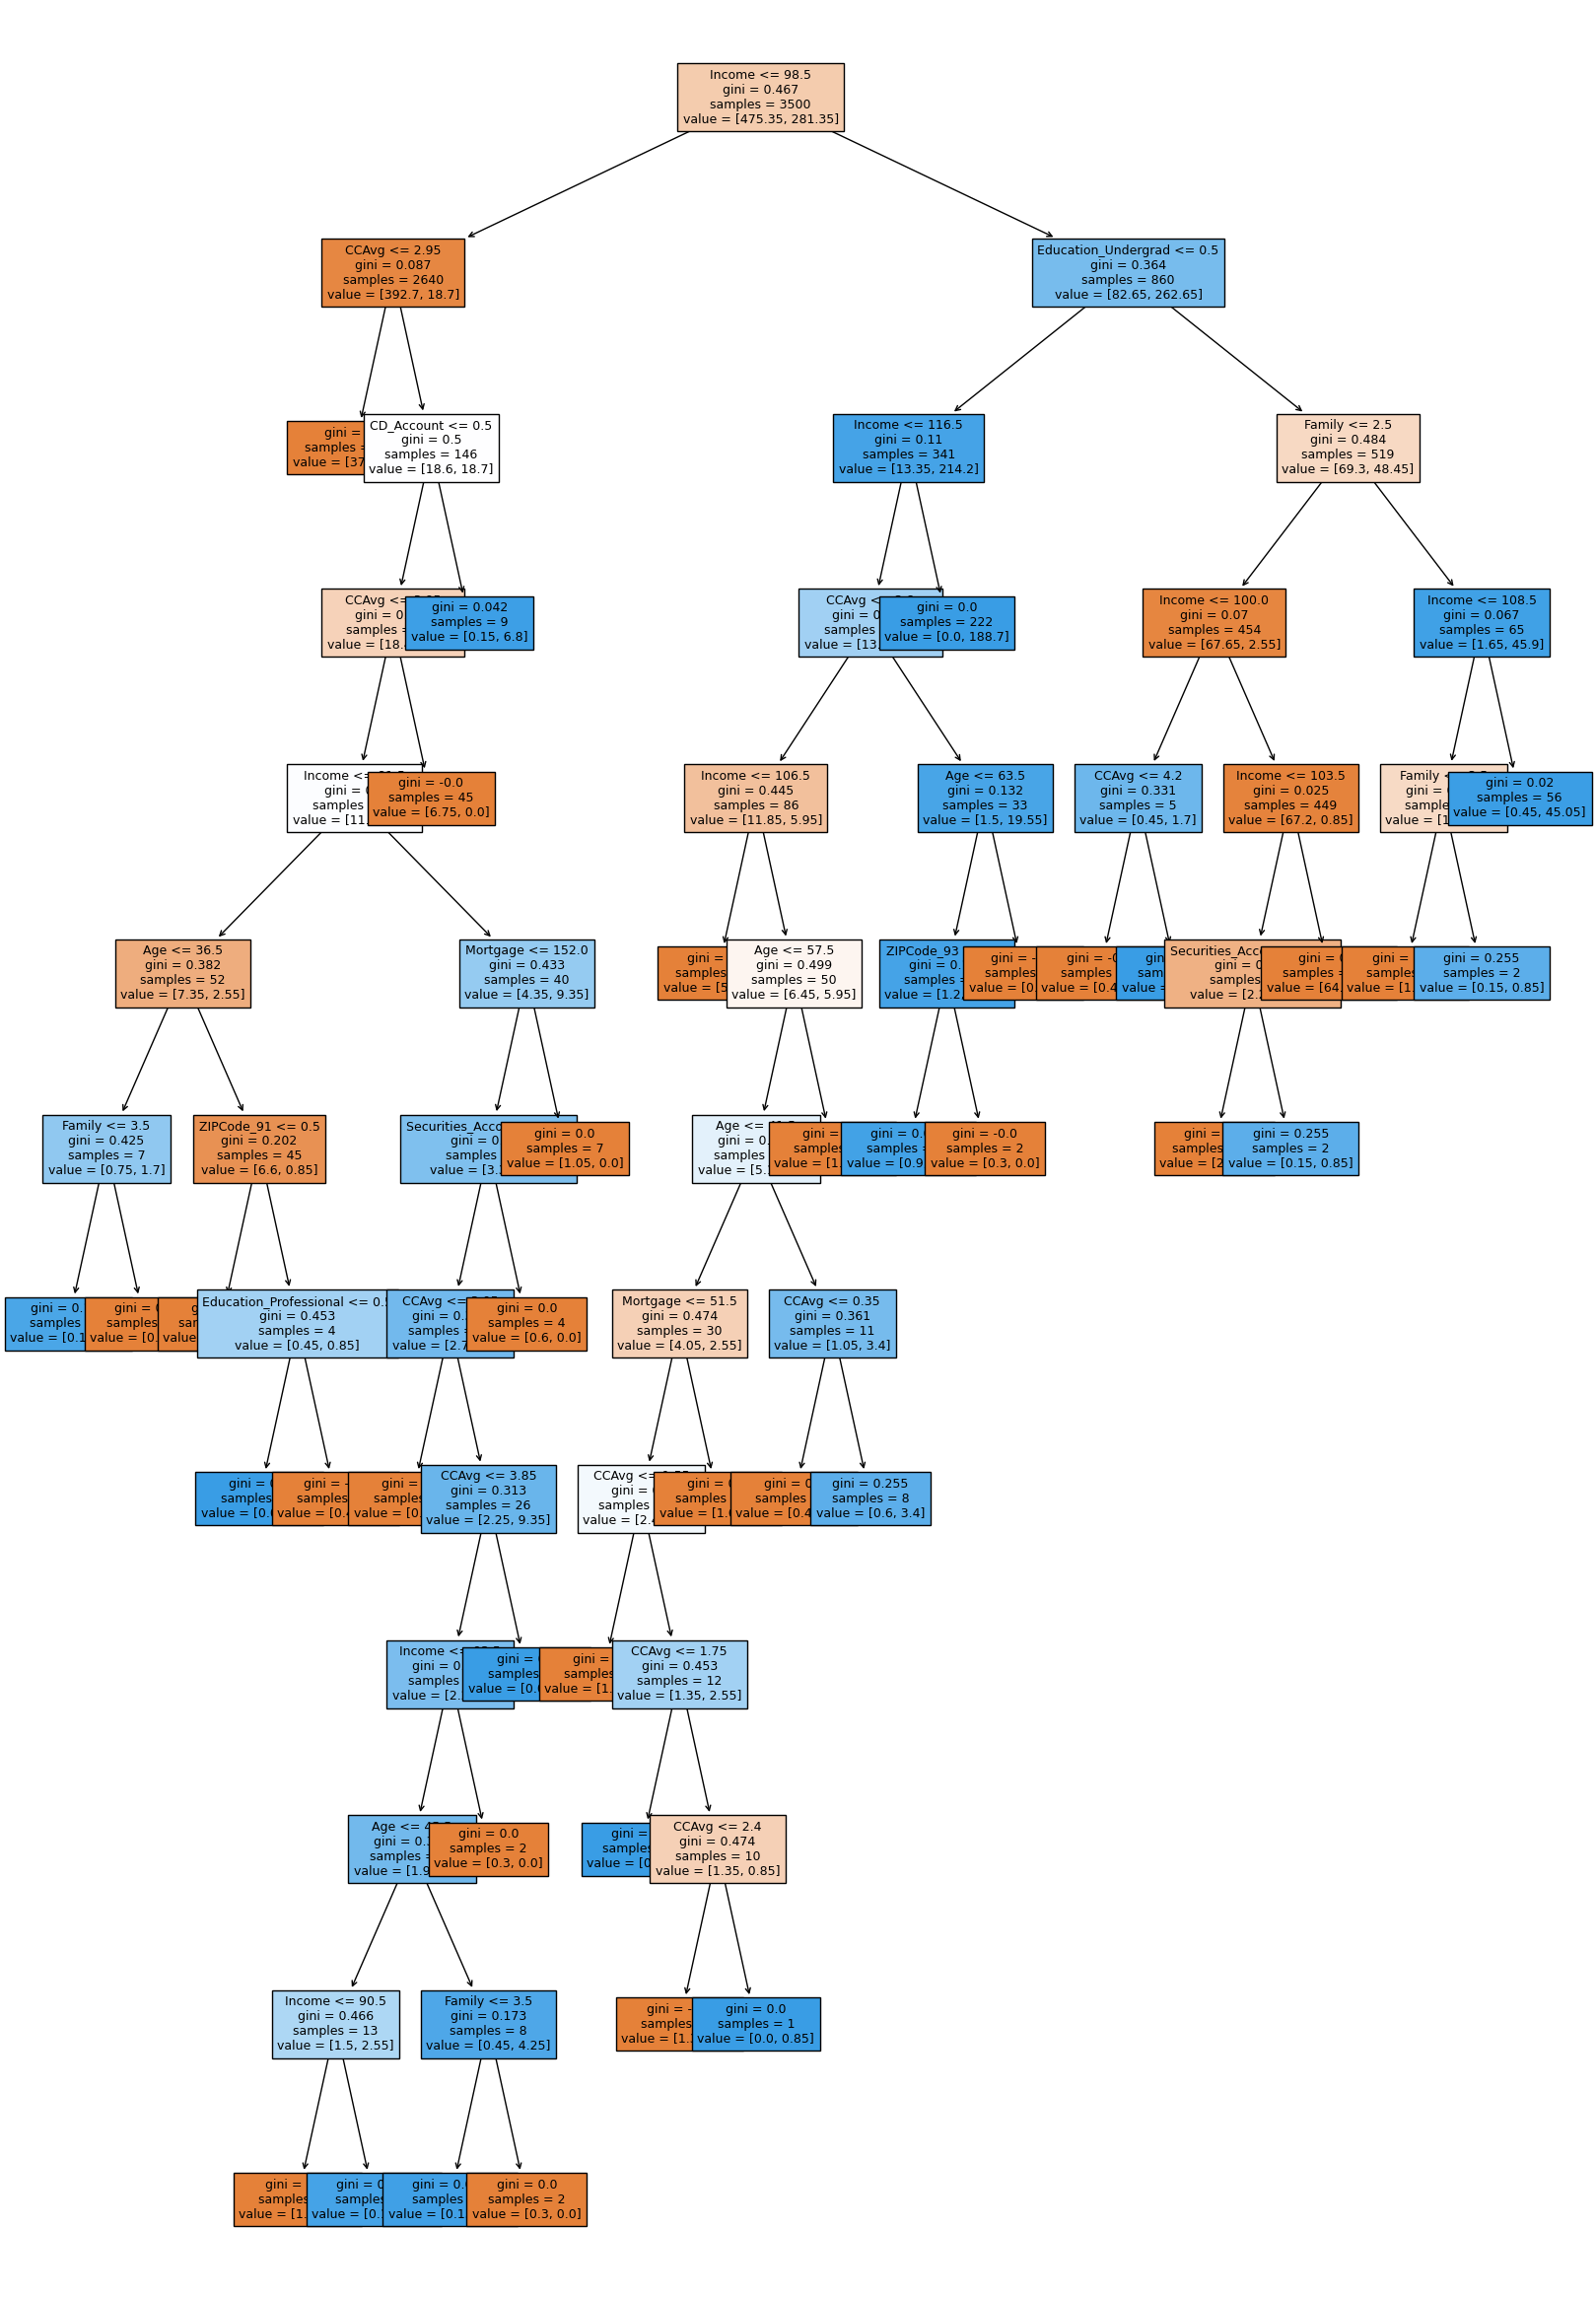

In [ ]:
plt.figure(figsize=(20, 30))
out = tree.plot_tree(
    Post_Tree,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [ ]:
print(tree.export_text(Post_Tree, feature_names=feature_names, show_weights=True))

|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [374.10, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- CCAvg <= 3.95
|   |   |   |   |--- Income <= 81.50
|   |   |   |   |   |--- Age <= 36.50
|   |   |   |   |   |   |--- Family <= 3.50
|   |   |   |   |   |   |   |--- weights: [0.15, 1.70] class: 1
|   |   |   |   |   |   |--- Family >  3.50
|   |   |   |   |   |   |   |--- weights: [0.60, 0.00] class: 0
|   |   |   |   |   |--- Age >  36.50
|   |   |   |   |   |   |--- ZIPCode_91 <= 0.50
|   |   |   |   |   |   |   |--- weights: [6.15, 0.00] class: 0
|   |   |   |   |   |   |--- ZIPCode_91 >  0.50
|   |   |   |   |   |   |   |--- Education_Professional <= 0.50
|   |   |   |   |   |   |   |   |--- weights: [0.00, 0.85] class: 1
|   |   |   |   |   |   |   |--- Education_Professional >  0.50
|   |   |   |   |   |   |   |   |--- weights: [0.45, 0.00] class: 0
|   |   |   |   |--- Income >  81.50
|   |   |   |   |   |--- Mortgage 

In [ ]:
importances = Post_Tree.feature_importances_

# Create a DataFrame with feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the DataFrame
print("Feature Importances:")
print(feature_importance_df)

Feature Importances:
                   Feature  Importance
1                   Income    0.602209
2                   Family    0.146348
10     Education_Undergrad    0.125135
3                    CCAvg    0.089356
6               CD_Account    0.011166
0                      Age    0.010191
4                 Mortgage    0.004929
5       Securities_Account    0.004788
11              ZIPCode_91    0.002635
9   Education_Professional    0.001690
13              ZIPCode_93    0.001552
15              ZIPCode_95    0.000000
14              ZIPCode_94    0.000000
8               CreditCard    0.000000
12              ZIPCode_92    0.000000
7                   Online    0.000000
16              ZIPCode_96    0.000000


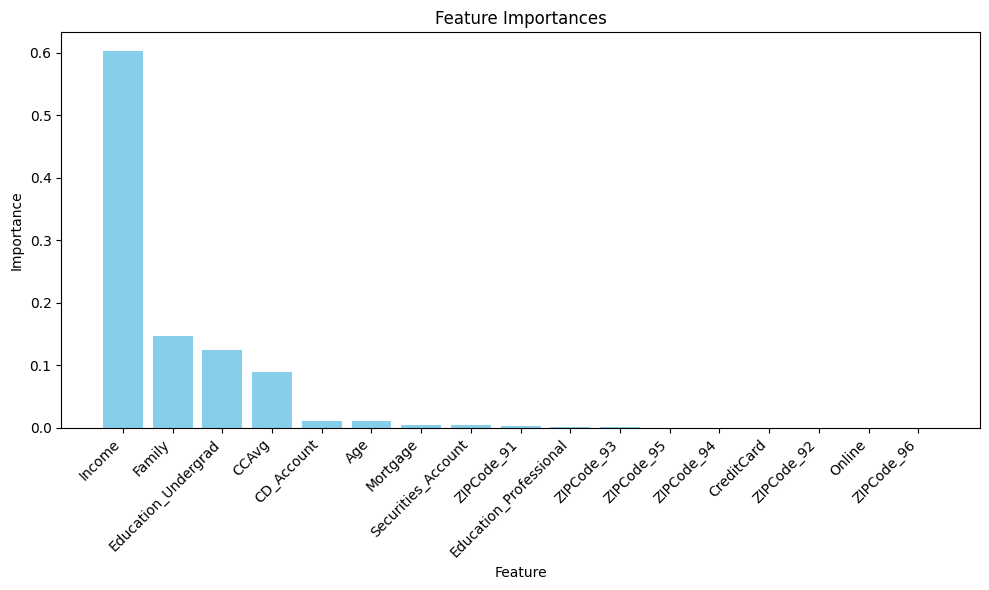

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

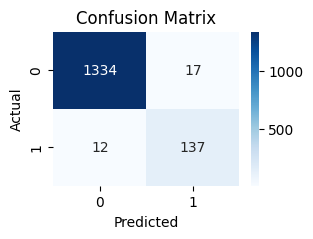

In [ ]:
#confusion matrix on test data
confusion_matrix(Post_Tree,X_test,y_test)

In [ ]:
#Performance on test data
dTree_post_perf_test= evaluate_classification_model(Post_Tree, X_test, y_test)
dTree_post_perf_test

,Accuracy,Precision,Recall,F1-Score
0,0.980667,0.88961,0.919463,0.90429


## Model Comparison and Final Model Selection

In [ ]:
models_train_comp_df = pd.concat(
    [dTree_perf_train.T, dTree_pre_perf_train.T, dTree_post_perf_train.T], axis=1,)

# Set column names
models_train_comp_df.columns = ["Decision Tree (Full grown)", "Decision Tree (Pre-Pruning)", "Decision Tree (Post-Pruning)"]

# Print the training performance comparison
print("Training performance comparison:")
print(models_train_comp_df)


Training performance comparison:
           Decision Tree (Full grown)  Decision Tree (Pre-Pruning)  \
Accuracy                          1.0                     0.990286   
Precision                         1.0                     0.968454   
Recall                            1.0                     0.927492   
F1-Score                          1.0                     0.947531   

           Decision Tree (Post-Pruning)  
Accuracy                       0.994571  
Precision                      0.945714  
Recall                         1.000000  
F1-Score                       0.972100  


In [ ]:
models_test_comp_df = pd.concat(
    [dTree_perf_test.T, dTree_pre_perf_test.T, dTree_post_perf_test.T], axis=1,)

# Set column names
models_test_comp_df.columns = ["Decision Tree (Full grown)", "Decision Tree (Pre-Pruning)", "Decision Tree (Post-Pruning)"]

# Print the testing performance comparison
print("Testing performance comparison:")
print(models_test_comp_df)

Testing performance comparison:
           Decision Tree (Full grown)  Decision Tree (Pre-Pruning)  \
Accuracy                     0.978667                     0.980000   
Precision                    0.892617                     0.928058   
Recall                       0.892617                     0.865772   
F1-Score                     0.892617                     0.895833   

           Decision Tree (Post-Pruning)  
Accuracy                       0.980667  
Precision                      0.889610  
Recall                         0.919463  
F1-Score                       0.904290  


Post-Pruning Deicison Tree has highest recall score (91%)  on testing data among other models and we would have to choose it for our loan approval prediction model.

In credit risk modeling, selecting a model based on the recall score is strategically important. Recall focuses on identifying all eligible customers who qualify for a loan, minimizing the risk of rejecting creditworthy applicants. Opting for higher recall ensures that our model is adept at capturing a larger proportion of potential customers, reducing the opportunity cost of losing valuable clients. Prioritizing recall aligns with our goal of striking a balance between risk mitigation and maximizing opportunities in the competitive lending landscape

## Actionable Insights and Business Recommendations


1. **Design Loans for Different Education Levels:**
Customize our loan offerings to cater to professionals and graduates. This approach ensures that our products resonate with the educational backgrounds of our customers, potentially increasing loan approval rates.

2. **Promote CD Accounts for Higher Loan Approvals:**
Encourage customers to open Certificate of Deposit (CD) accounts by highlighting the higher likelihood of loan approval for CD account holders. Consider targeted marketing to attract more customers to open CD accounts and boost loan approval rates.

3. **Fine-Tune Approvals Based on Income:**
Optimize our loan approval strategies by giving more weight to income-related factors. A more precise approach considering income levels will refine our decision-making, leading to better accuracy in loan approvals.

4. **Utilize Advanced Decision Tree Modeling:**
Embrace the use of advanced decision tree modeling for predicting loan approvals. This sophisticated technique provides valuable insights into customer profiles, enhancing the efficiency and accuracy of our credit risk assessments.

5. **Prioritize Customer Retention over Accuracy:**
Choose our modeling approach based on the recall score rather than accuracy. This decision aligns with our goal of retaining eligible customers. Recognizing the higher cost of losing potential clients who qualify for a loan, we prioritize customer retention over strict accuracy.

6. **Opt for Streamlined Decision Making:**
Select the decision tree model with cost complexity pruning. This model, with the highest recall score, efficiently identifies eligible customers. By adopting this streamlined decision-making process, we strike a balance between risk management and maximizing opportunities in our credit portfolio.


These recommendations aim to enhance our lending strategy by tailoring products, promoting specific account types, refining income-based strategies, adopting advanced decision tree modeling, and prioritizing customer retention while maintaining risk control. This approach ensures a more customer-centric and strategic lending process.

___